# Homework: Data Exploration

In [1]:
## Name: <span style="color:blue"> *Myles Green* </span>

## Utils

In [2]:
from typing import List, Dict, Tuple
import os
import gc
import traceback
import warnings
from pdb import set_trace

# Default seed
seed = 0

In [3]:
class TodoCheckFailed(Exception):
    pass

def todo_check(asserts, mute=False, **kwargs):
    locals().update(kwargs)
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    if not mute: print("Your code PASSED all the code checks!")


## Instructions
In this assignment, you will begin to experience and practice some of the initial stages of the ML pipeline: problem formulation, data gathering, and data visualization/exploration.

Your job is to read through the assignment and fill in any code segments that are marked by `TODO` headers and comments. Some TODOs will have a `todo_check()` function which will give you a rough estimate of whether your code is functioning as excepted. Other's might not have these checks, like visualization TODOs. Regardless,  all the correct outputs are given below each code cell. It might be useful to copy the contents of certain TODO cells into a new cell so you can try to match the desired output with the output produced by your own code! For visualization TODOs, you simply have to have a plot that looks similar. You can change aspects such as color, titles, or x/y-axis labels if you so wish.

At any point, if you feel lost concerning how to program a specific TODO, take some time and visit the official documentation for each library and read about the methods/functions that you need to use.

## Submission

1. Save the notebook.
2. Enter your name in the appropriate markdown cell provided at the top of the notebook.
3. Select `Kernel` -> `Restart Kernel and Run All Cells`. This will restart the kernel and run all cells. Make sure everything runs without errors and double-check the outputs are as you desire!
4. Submit the `.ipynb` notebook on Canvas.


# Data Exploration

## Problem formulation

<center><img src="https://insideclimatenews.org/wp-content/uploads/2023/03/wildfire_thibaud-mortiz-afp-getty-scaled.jpg" alt="drawing" width="500"/></center>

For this assignment, you will be tasked with exploring data related to the prediction of forest fires, a major environmental concern that affects forest preservations around the world.

However before getting into the data itself, it is important that we demonstrate how to properly formulate the goal of this assignment. Recall, that when formulating a problem, it is useful to ask yourself the following three questions:  

1. What is the problem?
2. Why does the problem need to be solved?
3. How would you solve the problem?

### What is the problem?
Well, as you might have already read, this assignment is aiming to tackle is forest fire prediction. To be more specific, let's focus on predicting forest fires in particular parks, like national parks. By doing so, we will simplify the problem by focusing on a specific park. The big assumption here is going to be that it will be possible to predict forest fires from data. But what kind of data do we need? If we do a little bit of research by reading research papers and talking with experts on the subject, we'll find that natural forest fires actually tend to coincide with the weather (what a shock)!

For instance, natural fires tend to coincide with high temperatures, dry conditions, and wind. All of which tend to be commonly recorded features in meteorological datasets [\[1\]](https://mylandplan.org/content/facts-about-fire)! Thus, the goal will be to find a meteorological dataset for a specific national park.

### Why does the problem need to be solved?
Why are we even looking at this problem to begin with. Well, to some of you this might be obvious, but let's make it clear anyway. 

One point of forest fire prediction is to help prevent fires by either predicting likely areas where they may occur or predicting how much a potential area could burn (identifying high risk areas). By making these predictions, we hope to allow for faster detection of fires by focusing on particular "high risk" areas and, in turn, becoming more successful at forest fire prevention. 

Now, this is just one way to frame why this problem needs to be solved. Feel free to think about your own personal take.


### How would you solve the problem?
To answer this question, think about how you would go about achieving or solving the problem (try to visualize what you would do for each of those 7 ML steps). Since you are likely new to ML, we will try to walk you through our thought process.

The first step you might think about is how would you gather data? Well, we tried to answer this question earlier. Recall, we talked about narrowing our focus down to national parks. The next step would be to contact parks and see if they do indeed have any open source data (particularly meteorological data). Further, we could search for related problems to see if they already have datasets, or we could simply try searching for a dataset related to forest fires. We will also have to make sure the dataset is labeled so that we can train our model to predict coordinates for which parts of the forest are likely to be vulnerable to fires or how much of an area will be burned.

Say we found some data, then what? What features will our data even have? We mentioned we would like some sort of meteorological data that maybe contains information about temperature, moisture, wind, etc. But are there other domain specific features out there? As none of us are forest fire expert, we probably do not have any clue if there are! Take note as this is a place of uncertainty that we have identified and would need to further investigate.

Okay, so let's also say we found some data with useful meteorological and domain specific features (whatever those may be). Now, what assumptions can we make about our data? Do we know what algorithm might actually be well suited for our problem? Notice, that these questions are becoming hard and harder to answer as we attempt to plan further into the future. Once answers start becoming this vague, it might be a good idea to get your hands dirty by finding some data and exploring it using these questions as guides.


### Summary

In summary, our goal is to help prevent and make firefighting easier by identifying "high risk" areas by either predicting likely areas where forest fires may occur or predicting how much a potential area could burn when a forest fire occurs. We think we can achieve these predictions by using some sort of labeled data where the labels are either coordinates for which parts of the forest have burned before or how much of an area was burned.

# Data Gathering and Loading
Welp, it turns out there is actually a perfect dataset for our problem! Who would have guessed, right? Recall that the [UCI Data Repository](https://archive.ics.uci.edu/ml/index.php) repository contains many different famous datasets. It just so happens that one of these datasets is called the Forest Fire Dataset. 

This dataset was captured from the Montesinho natural park (below image) in Portugal and contains meteorological data along with Fire Weather Index (FWI) features which are domain specific features used for rating fire danger. This dataset also has labels which correspond to how much forest area was burned for each data sample!


<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.PY9_GDitrSh7lTu-vd9pVwHaE1%26pid%3DApi&f=1">

## Library Imports
Before loading the data, you will need to import any Python libraries you think will be needed. For data handling (loading, storing, and manipulation), you can use either NumPy or Pandas. For plotting, you can use Matplotlib and Pandas (which has wrappers for Matplotlib which makes plotting super easy). 

Recall that Pandas is a high-level data manipulation and analysis tool built on-top of NumPy. In particular, it can be easier to work with when cleaning, visualizing, and preprocessing data. Plus, Pandas tends to be easier on the eyes when visualizing raw datasets. 

- [Pandas docs](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).
- [NumPy docs](https://numpy.org/doc/stable/)
- [Matplotlib docs](https://matplotlib.org/stable/contents.html)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Downloading
To begin, you need to first download the Forest Fire dataset using the following link: https://archive.ics.uci.edu/ml/datasets/Forest+Fires. While on the website, feel free to take your time and explore the other information on the web-page. The web-page will provide you with information about the dataset, along with research papers that have used this dataset. When ready, click the "Download" button, typically located in the top right corner, to download the dataset zip. Once done, unzip the dataset into the **SAME** directory/folder as this notebook. 

To display the local path of this notebook and the directory it is currently in, run the below code.

In [5]:
print(f"The current path for your notebook is:\n {os.getcwd()}\n")
print(f"Your notebook is currently in the following directory:\n {os.path.basename(os.getcwd())}")

The current path for your notebook is:
 /Users/mylesgreen/Documents/UNCCcompsci/ITCS-3156

Your notebook is currently in the following directory:
 ITCS-3156


#### TODO 1 (5 points): Data Loading and Displaying
Load the `forestfires.csv` by using Pandas `read_csv()` function. The  `read_csv()` function works by taking in a path to a csv file (e.g., `/home/user/Downloads/forestfires.csv`). However, since you should have moved the data into the same directory as this notebook, you will only need to pass the name of the csv `forestfires.csv`. 

**WARNING: Do NOT pass a path specific to your computer! If you do, the TA's will not be able to run your notebook without making changes to it. This is why we are having you move the dataset into the same directory as this notebook.**

1. Load Forest Fires dataset by passing the name of the csv file "forestfires.csv" to the Pandas function `read_csv()` ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Store the output into the `forestfire_df` variable.

2. Using the `forestfire_df` DataFrame you just defined, call the `columns` class variable to get all the column/feature names. Store the output into the variable `feature_names`.

In [6]:
# TODO 1.1

forestfire_df = None
forestfire_df = pd.read_csv("forestfires.csv") 
feature_names = forestfire_df.columns

In [7]:
todo_check([
    ("os.path.exists('forestfires.csv')", f"The forestfires.csv is not detected in your local path! You need to move the 'forestfires.csv' file to the same location/directory as this notebook which is {os.getcwd()}"),
    ("np.all(forestfire_df.iloc[0].values == np.array([7, 5, 'mar', 'fri', 86.2, 26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.0, 0.0], \
      dtype=object))", 'The 1st row does not match! Make sure you loaded the right dataset!')
])

Your code PASSED all the code checks!


To display the `forestfire_df` you can simply print it using Python's `print()` function. However, this does not look very nice.

In [8]:
print(forestfire_df)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


Instead, you can pretty print a Pandas DataFrame using Jupyter Lab/Notebooks built-in function `display()`.

In [9]:
display(forestfire_df)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [10]:
# TODO 1.2
feature_names = None
feature_names = forestfire_df.columns
print(f'The feature names are:\n{feature_names.values}')

The feature names are:
['X' 'Y' 'month' 'day' 'FFMC' 'DMC' 'DC' 'ISI' 'temp' 'RH' 'wind' 'rain'
 'area']


In [11]:
todo_check([
    ("np.all(feature_names.values == np.array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain', 'area'],dtype='object'))", "Wrong column names detected! Make sure you used .columns!")
])

Your code PASSED all the code checks!


# Data Visualization and Exploration

## Defining the features

Once you have loaded the data, it is time to understand what the provided features even mean.If you paid close attention, the web-page does provide a brief description of each feature. For your convince, the descriptions are posted below.

    X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
    Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
    month - month of the year: 'jan' to 'dec'
    day - day of the week: 'mon' to 'sun'
    FFMC - FFMC index from the FWI system: 18.7 to 96.20
    DMC - DMC index from the FWI system: 1.1 to 291.3
    DC - DC index from the FWI system: 7.9 to 860.6
    ISI - ISI index from the FWI system: 0.0 to 56.10
    temp - temperature in Celsius degrees: 2.2 to 33.30
    RH - relative humidity in %: 15.0 to 100
    wind - wind speed in km/h: 0.40 to 9.40
    rain - outside rain in mm/m2 : 0.0 to 6.4
    area - the burned area of the forest (in ha): 0.00 to 1090.84
    
Some of the features are pretty straight forward to understand like temp, RH (relative humidity), wind, rain, area, month, and day. But what about these other features like X, Y, FFMC, DMC, DC, and ISI which are more technical? 

X and Y are x-y coordinates that correspond with the below image that shows off Montesinho natural park.

<center><img src="https://www.researchgate.net/profile/Paulo-Cortez-4/publication/238767143/figure/fig1/AS:298804772392991@1448252017812/The-map-of-the-Montesinho-natural-park.png" width=500 height=500></center>

For the other variables (FFMC, DMC, DC, and ISI), you actually have to take a look at the [research paper](http://www.dsi.uminho.pt/~pcortez/fires.pdf) to get a better explanation. To save you some time, here is what it says.

> The forest Fire Weather Index (FWI) is the Canadian system for rating fire danger
and it includes six components (Figure 1) [24]: Fine Fuel Moisture Code (FFMC),
Duff Moisture Code (DMC), Drought Code (DC), Initial Spread Index (ISI), Buildup
Index (BUI) and FWI. The first three are related to fuel codes: the FFMC denotes the
moisture content surface litter and influences ignition and fire spread, while the DMC
and DC represent the moisture content of shallow and deep organic layers, which affect
fire intensity. The ISI is a score that correlates with fire velocity spread, while BUI
represents the amount of available fuel. The FWI index is an indicator of fire intensity
and it combines the two previous components. Although different scales are used for
each of the FWI elements, high values suggest more severe burning conditions. Also,
the fuel moisture codes require a memory (time lag) of past weather conditions: 16
hours for FFMC, 12 days for DMC and 52 days for DC.

In summary, it sounds like these remaining variables are domain specific variables related to a system for rating fire danger based on things like intensity, spread, and potential fuel.


## Exploring

Given your rough understanding of the features, it is time to start to developing a better intuition for each feature by exploring their values.


#### TODO 2 (5 points): Data Info 
When exploring a new dataset, you should first figure out how many data samples and features are present and the data type of each feature.

1. Get the shape of the `forestfire_df` DataFrame (which contains the number of data samples and features) by calling the `shape` class variable. Store the output into `ff_shape`.
   
2. Display a short the summary of the data by calling the `info()` method for the  `forestfire_df` DataFrame.

In [12]:
# TODO 2.1
ff_shape = None
ff_shape = forestfire_df.shape
print(f'The forest fire dataset shape is: {ff_shape}')

The forest fire dataset shape is: (517, 13)


In [13]:
todo_check([
    ("ff_shape == (517, 13)", 'The shape recieved for ff_shape did not match the shape (517, 13)')
])

Your code PASSED all the code checks!


So it looks like we have 517 data samples and 13 features based on the shape output given above (one of which will be our target/label). Keep in mind that 517 samples is actually a pretty low number of data samples for today's standards. Learning might be difficult due to not having enough data.

In [14]:
# TODO 2.2
forestfire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Based on the output of the `info()` method, you should be able to see that all the features are either integers or floats, except for the 'month' and 'day' features. You can tell this by looking at the "Dtype" column, which stands for data types ([dtype docs](https://numpy.org/doc/stable/reference/arrays.dtypes.html)). It seems the 'month' and 'day'  are classified as an "object". When Pandas or NumPy encounters a string, it will assign it the dtype "object". Thus, 'month' and 'day' are strings (this can be confirmed by looking at the values of month/day in the displayed `forestfire_df` provided above).

Lastly, it is worth noting that `info()` is reporting that there are no null values in any of our features columns, as the "Non-Null Count" is empty for each feature! That's good, that means there are no missing values, and you will explore this manually later on.


#### TODO 3 (10 points): Month and Day Visualization

Take a closer look at 'month' and 'day' features to see if you can gain any further insights about the data. For these TODOs use either `iloc`, `loc` or square brackets `[ ]` to slice/index the `forestfire_df` DataFrame.

1. Index the 'month' column from our `forestfire_df` feature and call the `value_counts()` method ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)) on said column data to get the number of times each month appears in the data. Store the output into the variable `month_counts`.

2. Plot `month_counts` using the Matplotlib bar plot function `plt.bar()` ([docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)) so that the months are displayed on the x-axis and the month counts are displayed on the y-axis.
    1. Hint: To easily accesses the month names, use the `.index` class variable for `mounth_counts`.

3. Index the 'day' column from our `forestfire_df` feature and call the `value_counts()` method on said column data to get the number of times each day appears in the data. Store the output into the variable `day_counts`.

4. Plot `day_counts` using the Matplotlib bar plot function `plt.bar()` ([docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)) so that the days are displayed on the x-axis and the day counts are displayed on the y-axis.

In [15]:
# TODO 3.1
month_counts = None
month_counts = forestfire_df['month'].value_counts()
display(month_counts)

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

In [16]:
todo_check([
    ("np.all(month_counts.values == np.array([184, 172,  54,  32,  20,  17,  15,   9,   9,   2,   2,   1]))", 'Month values did not match!')
])

Your code PASSED all the code checks!


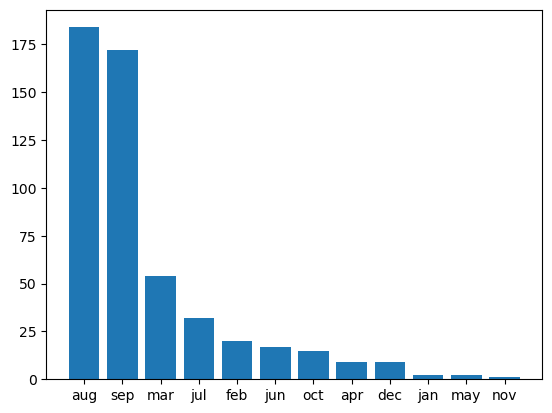

In [17]:
# TODO 3.2
plt.bar(month_counts.index,month_counts)
plt.show()

You should notice that the majority of the data is focused around August and September. While it is currently unclear why this is the case, it could be related to an increase in the number of fires during these months or perhaps the data is biased and simply more samples were drawn from these two months than the rest.

In [18]:
# TODO 3.3
day_counts = None
day_counts = forestfire_df['day'].value_counts()
display(day_counts)

day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64

In [19]:
todo_check([
    ("np.all(day_counts.values == np.array([95, 85, 84, 74, 64, 61, 54]))", 'Month values did not match!')
])

Your code PASSED all the code checks!


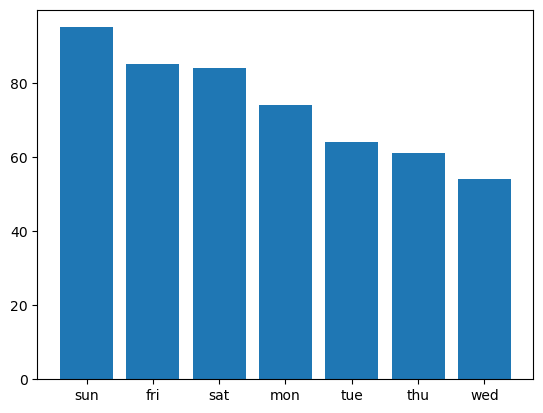

In [20]:
# TODO 3.4
plt.bar(day_counts.index, day_counts.values)
plt.show()

After observing the values for the 'day' feature, it seems much harder to pick out any obvious patterns, as the days seem to be randomly distributed.

#### TODO 4 (10 points): Null Check

While the `info` method used previously indicated that there were no nulls or missing values, it is possible to check manually. If there are any nulls or missing values, then these will need to be dealt with during the data cleaning phase by filling them or dropping the entire data sample.

1. Convert our `forestfire_df` into a boolean DataFrame (true indicates a value is a missing) using the Pandas DataFrame `isnull()` method ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)). Store the output into the `forestfire_isnull` variable.

It's hard to see if every single element in the dataset is false. If only there was an easier way. Well, there is! You can use the NumPy function `any()` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.any.html)) to check if every boolean in `forestfire_isnull` is false. In other words, `any()` will only return true if at least one element in `forestfire_isnull` is true.

2. Use the NumPy `any()` function to determine if `forestfire_isnull` has any True values indicating there are null elements in the data. Store the output into the variable `hasnull`.

In [21]:
# TODO 4.1
forestfire_isnull = None
forestfire_isnull = forestfire_df.isnull()
display(forestfire_isnull)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
todo_check([
    ("forestfire_isnull.shape == (517,13)", "forestfire_isnull shape does not match (517, 13)"),
    ("np.all(forestfire_isnull.iloc[10:20, 0].values == np.array([False, False, False, False, False, False, False, False, False,False]))", "The values of forestfire_isnull were incorrect!")
])

Your code PASSED all the code checks!


In [23]:
# TODO 4.2
hasnull = None
hasnull = forestfire_isnull.any().all()
print(f"Value of hasnull is {hasnull}")


Value of hasnull is False


In [24]:
todo_check([
    ("hasnull == False", 'hasnull should be False as there are no null values in the dataset!')
])

Your code PASSED all the code checks!


After observing the value of `hasnull`, you should see that the function returned False. This means there are no missing data samples and there is no need to fill in or interpolate any data samples at this time.


#### TODO 5 (15 points): Data Statistics

Next up, we need to check out the statistics of the numerical features in the data, such as the mean and standard deviation. Such scale information will prove to be vital in the future, as ML algorithm can have a hard time learning if the scales of all the features are different. For instance, an algorithm might end up valuing a feature more just because it has a larger scale, which is not what we want.


1. Use the Pandas DataFrame `describe()` method on our `forestfire_df` to get a statistical summary for each of our numerical features. Store the output into the variable `ff_describe`.

2. Using a box plot, visualize the statistics of the data by calling the Pandas `.boxplot()` method ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)) for `forestfire_df`.

3. Visualize each numerical feature's box plot separately by creating a for-loop which loops over all column names (i.e., features) in `forestfire_df` and plots a single box plot for the current column by passing the column name to the `boxplot()` method (you used this method in the previous step).
    1. Hint: You will need to avoid plotting the 'day' and month 'columns' as they are non-numerical. 
    2. Hint: Be sure to add `plt.show()` after plotting within the for-loop, or all the plots will be plotted on top of each other.

In [25]:
# TODO 5.1
ff_describe = None
ff_describe = forestfire_df.describe()
display(ff_describe)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [26]:
todo_check([
    ("ff_describe.shape == (8, 11)", 'ff_describe shape did not match (8, 11)'),
    ("np.all(np.isclose(ff_describe.values[:4, 2:4].flatten(), np.array([517.        , 517.        ,  90.64468085, 110.87234043,5.52011085,  64.04648225,  18.7       ,   1.1       ]),rtol=.01))", 'The values of ff_describe were wrong!'),
])

Your code PASSED all the code checks!


You should notice that nearly every feature has a different mean and STD. For example, the 'DC' features has a mean of ~547 while the rain feature has a mean of ~ 0.0216.  This is an indication that the features have different scales!

Further, take note of how large the standard deviation or [STD](https://en.wikipedia.org/wiki/Standard_deviation) is for some of the features. If you have a large mean and comparably large STD, this is not necessarily a problem. However, if you have a small mean and a very large STD, this can cause trouble for learning as the values for said feature will vary drastically. For instance, the area has a small mean and a much larger STD. Keep this in mind as you'll investigate this more soon.

As a side note, the `describe()` method also provides the min, max, count, and the [percentiles](https://www.w3schools.com/python/python_ml_percentile.asp) values.

Finally, notice that the 'day' and 'month' features are not included. This is because their values are non-numerical (in this case they are string values) and computing the statistics is impossible.  

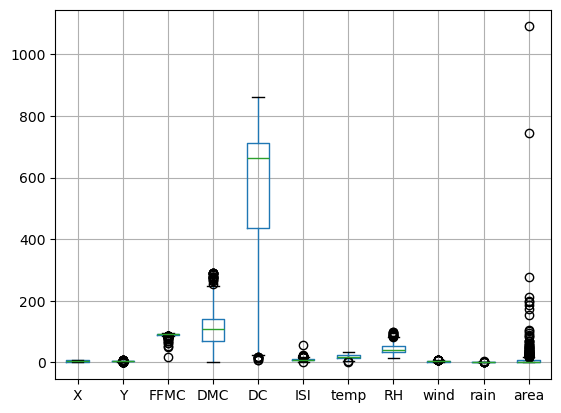

In [27]:
# TODO 5.2
forestfire_df.boxplot()
plt.show()

 For those that do not know how to read a box plot, refer to this blog [*Box Plot Explained*](https://www.simplypsychology.org/boxplots.html). Any black circle here indicates an outlier or anything above the maximum or below the minimum (i.e., the whiskers). 
 
 As you should see, this is not a very informative plot because all the features have different scales. So, features with small scales are all squashed towards 0, making them unreadable.

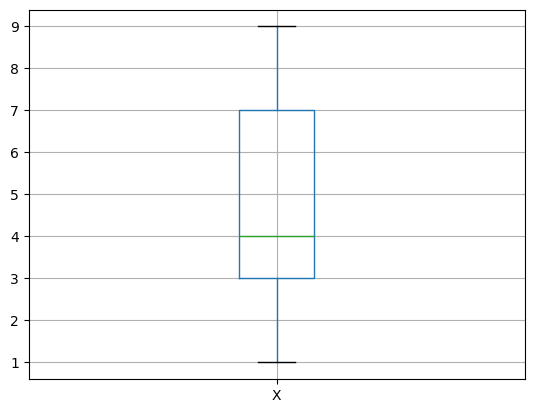

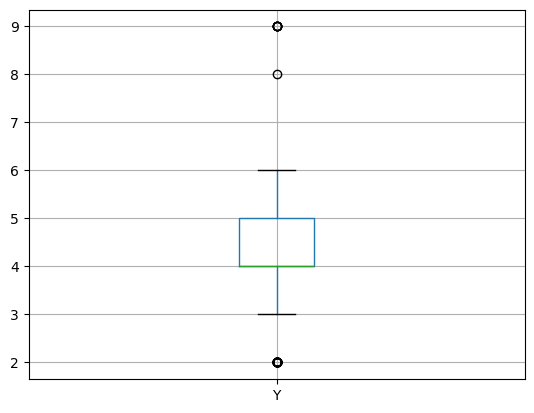

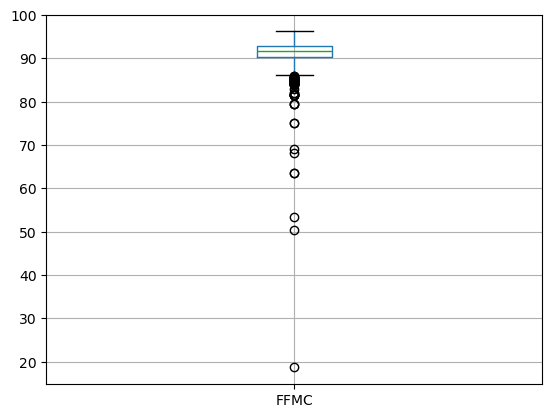

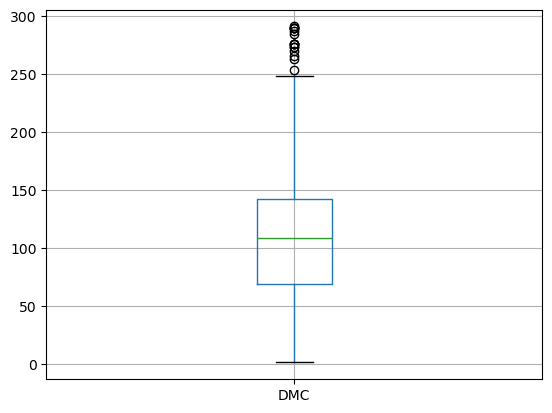

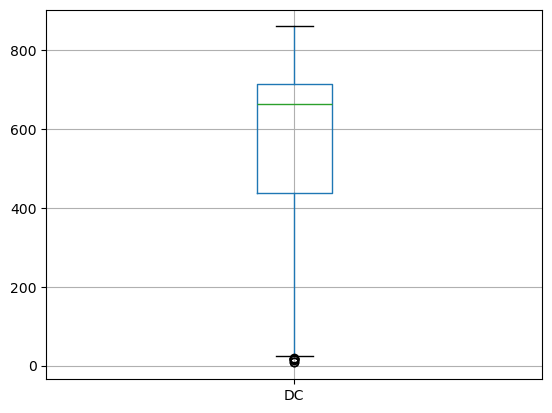

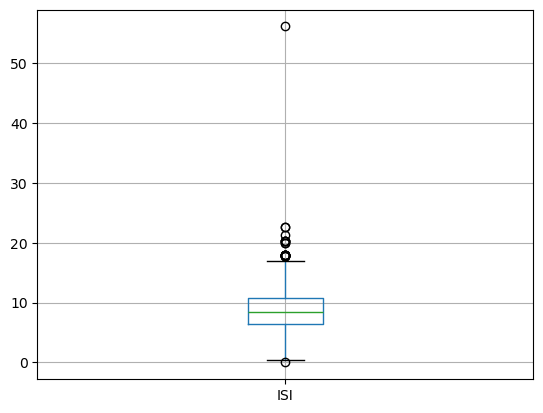

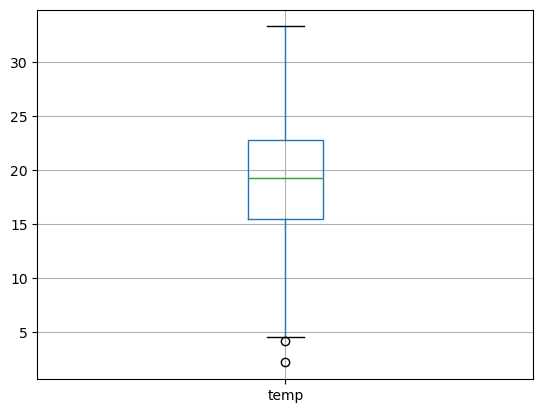

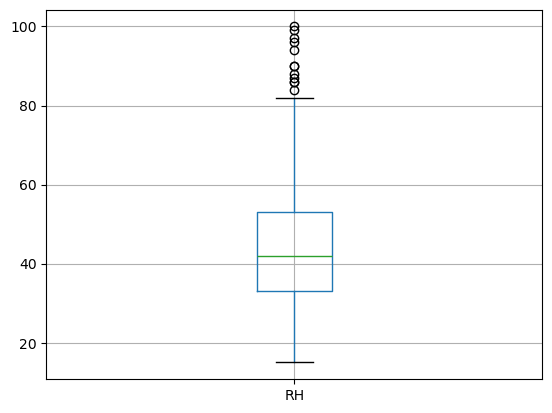

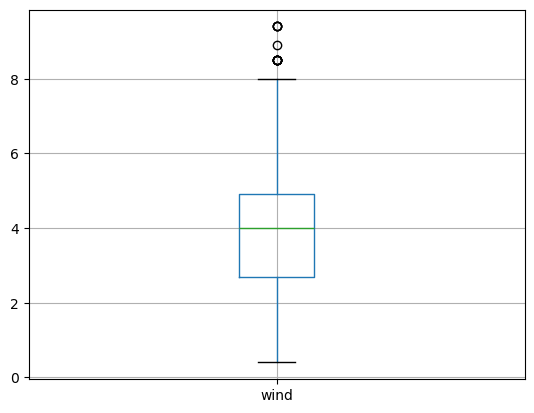

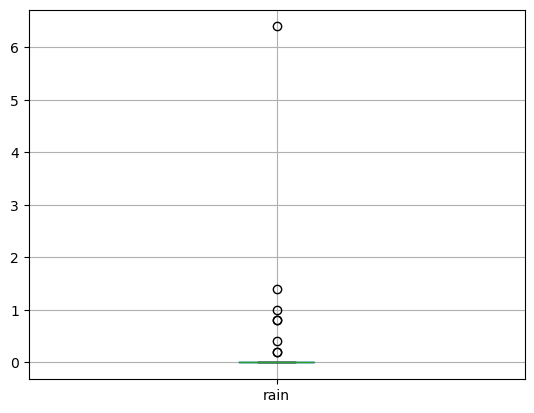

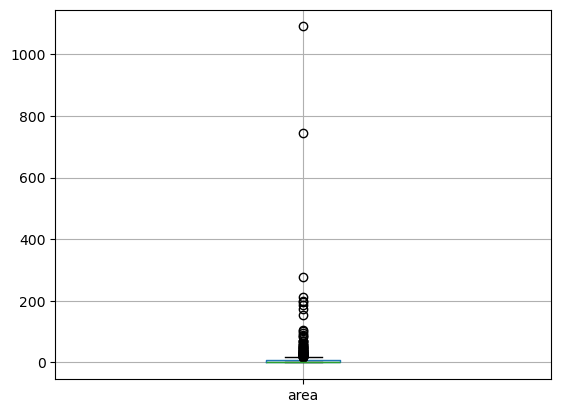

In [28]:
# TODO 5.3
for i in forestfire_df.columns:
    if forestfire_df[i].dtype != object:
        forestfire_df.boxplot(i)
        plt.show()

#### TODO 6 (10 points): Area Visualization

Now it's time to take a closer look at the target/label, the 'area' column. To do so, you need to take a look at the actual values and see if there are any glaring issues. Recall, as previously observed, the 'area' column had a small mean and large STD. It is time to see why this might be the case.

1. Store the 'area' data into a separate variable. Do so by indexing the 'area' column using Pandas' `iloc`, `loc` or square brackets `[ ]`. Store the output into the variable `area_values`.
   
2. To more easily visualize the 'area' values, create a histogram. To do so, plot `area_values` using the Matplotlib `plt.hist()` function ([docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)).
    1. Hint:  The only required parameters are `x` for the function. The `bins` parameter (used to help to discretize continuous data by breaking into discrete chunks) is optional and will automatically be competed using the passed data. 

3. Call the `value_counts()` method for `area_values` to see how many data samples have values near 0. Store the output into the variable `area_value_count`.

4. To more easily view the range of values, sort `area_value_count` by the index value by calling the `sort_index()` ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html)) method for `area_value_count`.  Store the output back into the variable `area_value_count`.


In [29]:
# TODO 6.1
area_values = None
area_values = forestfire_df['area']
display(area_values)

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [30]:
todo_check([
    ("area_values.shape == (517,)", 'area_values shape did not match (517,)'),
    ("np.all(area_values.values[-10:] == np.array([ 0.  ,  0.  ,  2.17,  0.43,  0.  ,  6.44, 54.29, 11.16,  0.  ,0.  ]))", 'area_values did not contain the correct values!')
])

Your code PASSED all the code checks!


Just from the quick printout of the values for `area_values` you should already be noticing lots of zero values.

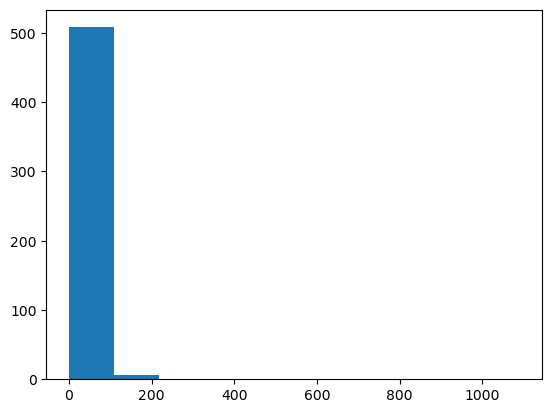

In [31]:
# TODO 6.2
plt.hist(area_values)
plt.show()

Notice, the majority of the area values are centered around 0 such that the data seems to be [skewed positively or to the right](https://www.investopedia.com/terms/s/skewness.asp).

In [32]:
# TODO 6.3
area_value_count = None
area_value_count = area_values.value_counts()
display(area_value_count)

area
0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: count, Length: 251, dtype: int64

In [33]:
todo_check([
    ("area_value_count.shape == (251,)", 'area_value_count shape did not match (251,)'),
    ("np.all(area_value_count.values[:5] == np.array([247,   3,   2,   2,   2]))", 'area_value_count values did not match!')
])

Your code PASSED all the code checks!


In [34]:
# TODO 6.4
area_value_count = area_value_count.sort_index()
display(area_value_count)

area
0.00       247
0.09         1
0.17         1
0.21         1
0.24         1
          ... 
200.94       1
212.88       1
278.53       1
746.28       1
1090.84      1
Name: count, Length: 251, dtype: int64

In [35]:
todo_check([
    ("area_value_count.shape == (251,)", 'area_value_count shape did not match (251,)'),
    ("np.all(area_value_count.values[:5] == np.array([247,   1,   1,   1,   1]))", 'area_value_count values did not match!')
])

Your code PASSED all the code checks!


Now, looking at the exact numbers, you should be able to see that a majority (247 samples) of the area values are zero (no forest area was burned). However, further take note that the maximum value is 1090.84 and that there are many values reported in between 0 and 1090, yet they all have a count near 1. This spread of the data, with the majority of the data samples having an area of 0, is likely the cause of the data having a small mean but a large STD. As such, the 'area' data is positively or right skewed!

#### TODO 7 (10 points): Area Transformation

Interpreting skew data can be hard, therefore, it is often desirable to try and spread out the distribution using various data transformation. Additionally, having a skewed target can present problems for certain ML algorithms, making learning more difficult. It turns out there is a handy stats trick called the [logarithmic transformation](https://machinelearningmastery.com/skewness-be-gone-transformative-tricks-for-data-scientists/) where taking the $\log$ of a skewed distribution helps to spread out the data (making it more [Gaussian-like](https://en.wikipedia.org/wiki/Normal_distribution) which is usually preferable).

1. Apply the log transform to `area_values` by passing it to NumPy's `log()` function. Recall that it is impossible to compute $\log(0)$. Therefore, you need to add 1 to `area_values` before taking the log. Store the output into the variable `log_area_values`.

2. Once again, create a histogram now using the log scaled values stored inside `log_area_values` using the Matplotlib `plt.hist()` function ([docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)).

3. Call the `describe()` method for `log_area_values` to get a statistical summary of the log transformed 'area' values. Store the output into the variable `log_area_describe`.

In [36]:
# TODO 7.1
log_area_values = None
log_area_values = np.log(area_values + 1)
display(log_area_values)

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

In [37]:
todo_check([
    ("isinstance(log_area_values, (pd.Series))", 'log_area_values should be a pd.Series.'),
    ("np.isclose(log_area_values.values[-4:-2], np.array([4.01259206, 2.49815188]), rtol=0.01).all()", 'log_area_values values did not match!')
])

Your code PASSED all the code checks!


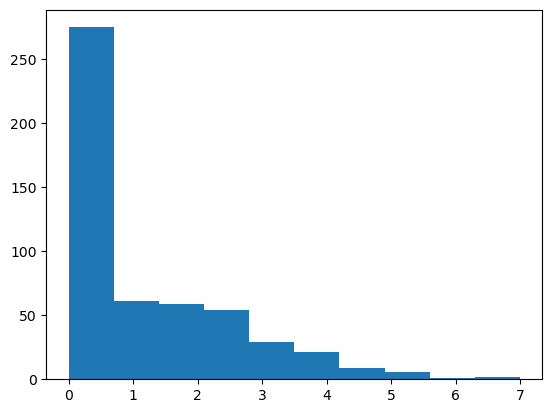

In [38]:
# TODO 7.2
plt.hist(log_area_values)
plt.show()

Now, you should be able to see that the value range (the x-axis) for the 'area' values has been greatly condensed. This should allow to more easily see the spread of the counts for each value bin.

In [39]:
# TODO 7.3
log_area_describe = None
log_area_describe = log_area_values.describe()
display(log_area_describe)

count    517.000000
mean       1.111026
std        1.398436
min        0.000000
25%        0.000000
50%        0.418710
75%        2.024193
max        6.995620
Name: area, dtype: float64

In [40]:
todo_check([
    ("isinstance(log_area_describe, (pd.Series))", 'log_area_describe should be a pd.Series.'),
    ("np.isclose(log_area_describe[['max', 'mean', 'std']].values, np.array([6.99561963, 1.11102577, 1.39843596]), rtol=0.01).all()", 'log_area_values values did not match!')
])

Your code PASSED all the code checks!


Now, if you take a look at the mean and STD you should see that the STD value more in line with the mean. Additionally, you should see that the max value has shrunk significantly. 

#### TODO 8 (5 points): Feature Scatter Matrix
Next, it is time to investigate the relationships between the features in the data and the distributions of each feature. It is important to investigate relationships to see how each feature compares with every other feature. In doing so, you can begin to observer trends in the data. Distributions are important to investigate in order to see how each feature is distributed - just like you did for target/label 'area'. 

To achieve both the comparison of features against one another and to observe the distributions of each feature, a handy tool called a scatter matrix can be employed. 

**WARNING: Plotting the scatter matrix can take a while!**

1. Use Panda's `scatter_matrix()` function ([docs](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)) to plot a scatter matrix. Pass `forestfire_df` as input. If the graph is too small, pass a larger `figsize` as an additional argument (e.g., `figsize=(15, 15)`).

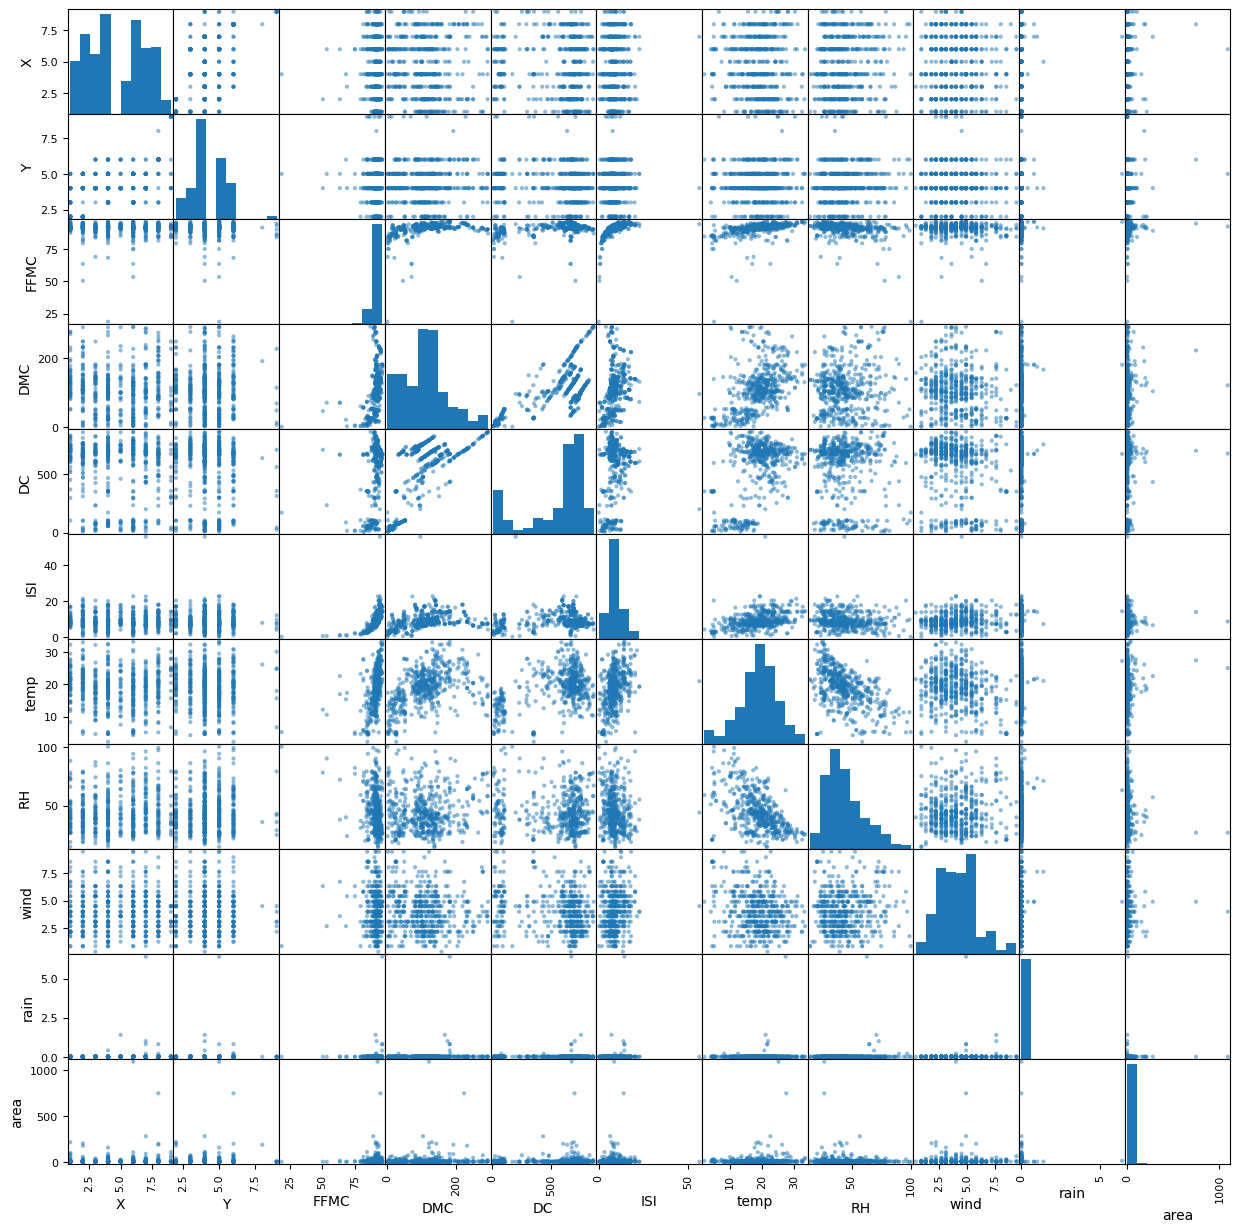

In [41]:
# TODO 8.1
pd.plotting.scatter_matrix(forestfire_df, figsize=(15, 15))
plt.show()

If you read the docs all `scatter_matrix` does is plot each feature against one another. If a feature is plotted against its self, then the distribution over all the feature's values is given. For instance, the bottom right corner is the histogram you plotted for 'area'. Also notice that the plot is symmetric and 'day' and 'month' are not included. 

Now it can be hard to see any patterns as there is a lot of information being thrown at you. You might say there are some linear-like trends for the feature pairs  'DMC' and 'DC'. However, what might be more useful is looking at a reduced version of this graph, where you compare all the input features (everything but the target) against your target/label ('area' in this case).

#### TODO 9 (20 points): Area-Feature Scatter Matrix

First, you must drop the 'area' column from the data so that only the input features remain. The `log_area_values` will be used in-place of the original 'area' columns values.

1. Drop the 'area' column from the `forestfire_df` by calling the `drop()` ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)) method and passing the name column name 'area'. Store the output into the variable `X`.
    1. Hint: Be sure to pass the correct `axis` argument. `axis=0` corresponds to the rows or indexes, and `axis=1` corresponds to the columns. To know which one to use, think about whether 'area' is a row or column name.

Next, you will need to create a subplot. A subplot is a plot that contains many smaller plots. As there are 12 features (not including 'area') the subplot must have 12 plots. One way this can be achieved is by having 3 rows and 4 columns of plots. Each `ax` will represent one plot, therefore, once `ax` is flattened, it should have a length of 12.

2. Create a subplot by using Matplotlib's `plt.subplots()` function ([docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)). The subplot should have 3 rows and 4 columns. Store the output into the variables `fig` and `ax`.
    1. Hint: Look at the docs to see which argument is used to set the number of rows and columns.
    2. Hint: If the graph is too small, pass a larger `figsize` as an additional argument (e.g., `figsize=(15,15)`).
   
**Inside the for-loop**

The loop code is looping over the column names, where the current column name is stored in `column_name`. `enumerate` is a counter and stores the corresponding index of the current column name inside `idx`. Since there are 12 column names and 12 plots, `idx` can be used to index `ax`. 

3. Index the current `ax` using the variable `idx`. Store the output into `current_ax`. `current_ax` will represent the current plot you are plotting to.

4. Create a scatter plot by calling the `plot()` method for `current_ax`. Pass the `log_area_values` as the x-values, the current feature data as the y-values, and the format string `'.'` (to make the plot a scatter plot).

    1. Hint: You can get the current feature data by indexing `X` by the current column name `column_name`.

X has the following columns:
['X' 'Y' 'month' 'day' 'FFMC' 'DMC' 'DC' 'ISI' 'temp' 'RH' 'wind' 'rain']


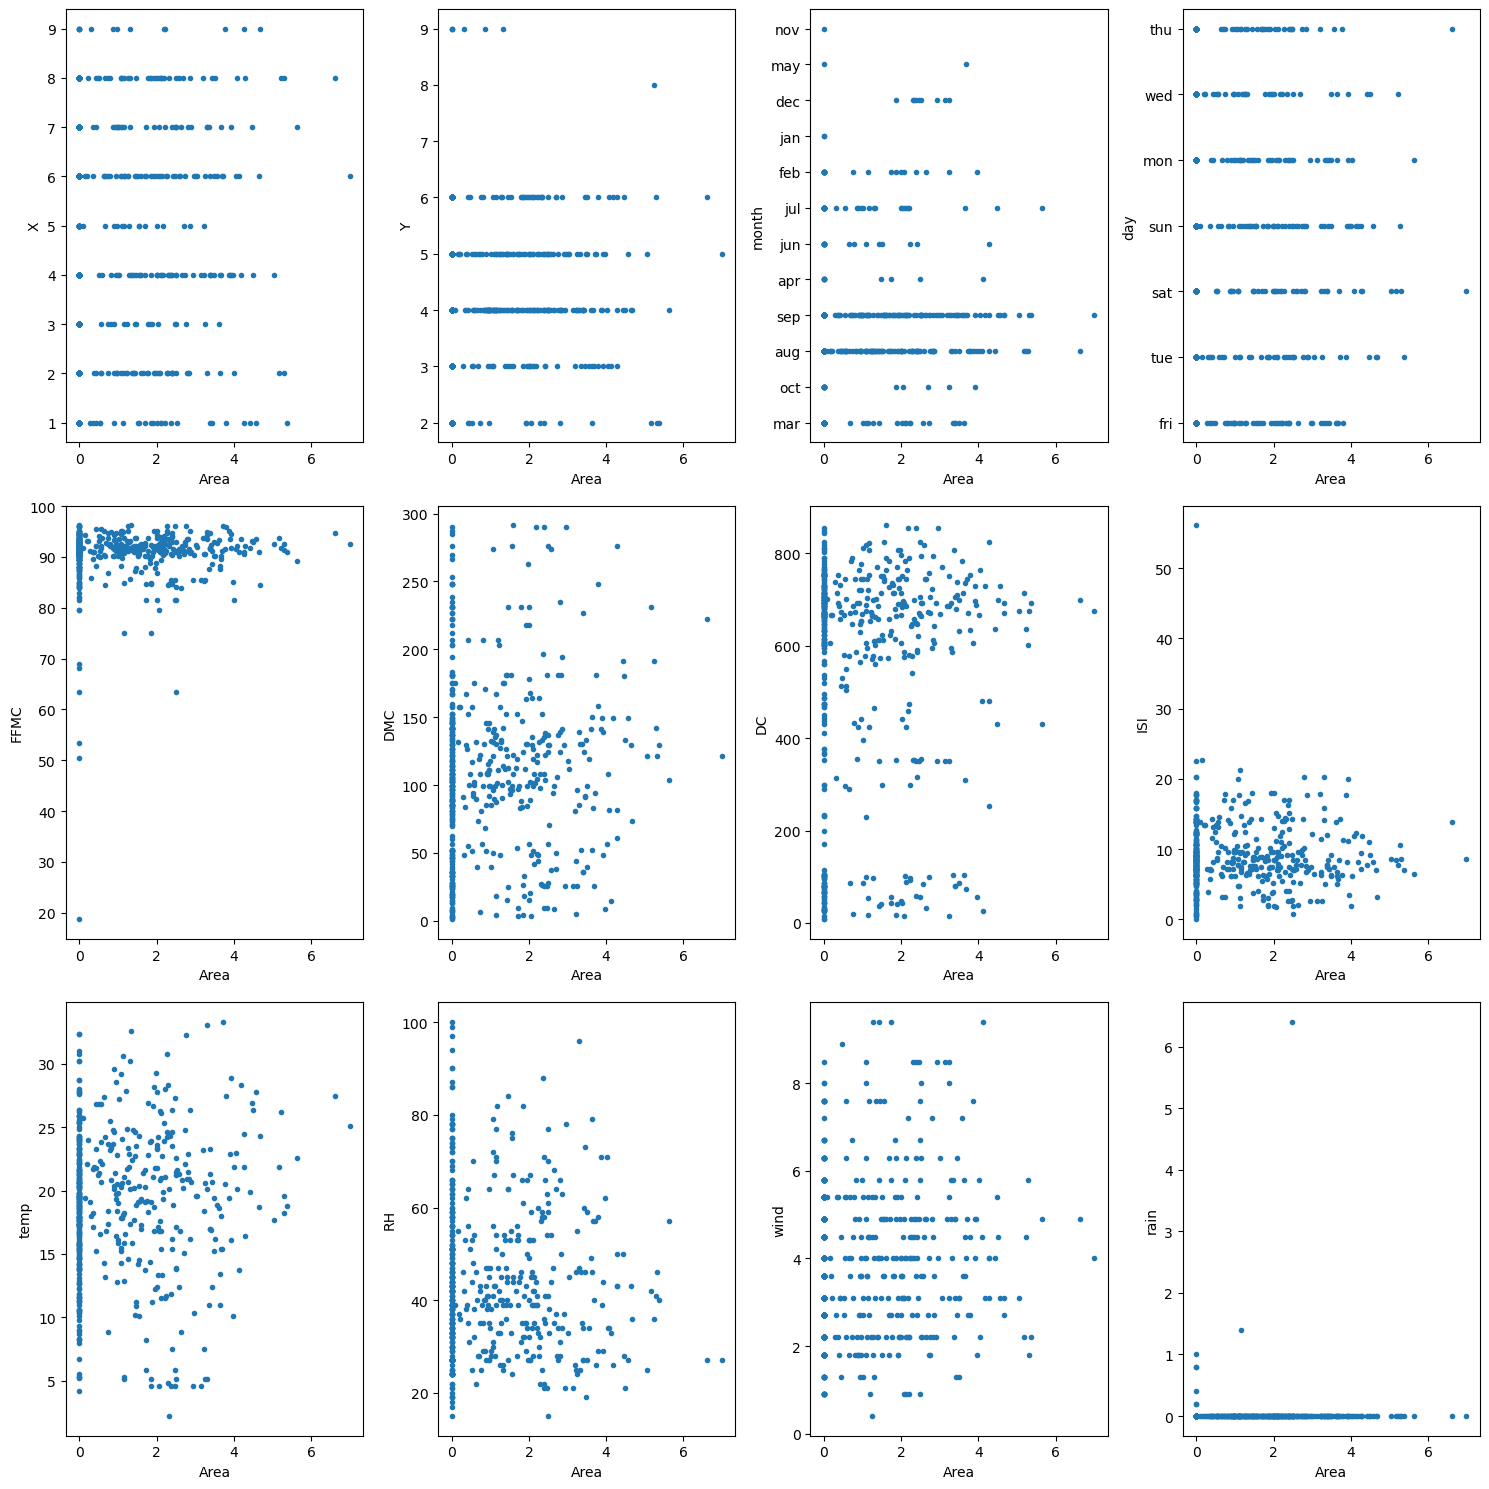

In [42]:
# TODO 9.1
X = None
X = forestfire_df.drop('area', axis=1)
print(f"X has the following columns:\n{X.columns.values}")

# TODO 9.2
fig, ax = None, None
fig, ax = plt.subplots(3,4, figsize=(15,15))

# Flatten ax so it is a 1D array and is easier to index when plotting
ax = ax.flatten()

# Loops over the column names where eneumerate is simply a counter starting a 0
for idx, column_name in enumerate(X.columns.values):
    # TODO 9.3
    current_ax = None
    current_ax = ax[idx]
    
    # TODO 9.4
    current_ax.plot(log_area_values, X[column_name], '.')

    # Sets the y-axis label to the column names
    current_ax.set_ylabel(column_name)
    # Sets the x-axis label to be Area
    current_ax.set_xlabel('Area')
    
# Used to create better spacing between subplots
fig.tight_layout()
plt.show()

Given the below picture of what different correlations can look like, do you see any? (the numbers above indicate the correlation coefficient which you will compute next).

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1280px-Correlation_examples2.svg.png)

Well, using this qualitative visualization, it does not look like the features have any obvious correlations with the 'area' targets. However, do note that it is hard to observe any correlations as many of the variables take on discrete values like the features 'X', 'Y', 'month' and 'day'. 

#### TODO 10 (10 points): Correlation Matrix

To quantitatively confirm that there are no correlations between the features and the target 'area', you can compute a correlation matrix which contains the correlation scores for every feature pair. Recall from statistics that the correlation coefficient ranges from -1 to 1. When close to 1, it means there is a strong positive correlation. Likewise, when close to -1, there is a strong negative correlation. When the correlation is near zero it means there is a very weak or there is no correlation at all.

1. Call the `corr` method ([docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)) for the `forestfire_df` DataFrame to compute the correlation matrix of all **numerical** feature pairs. Store the output into the variable `corr_matrix`.
    1. To only use the numerical features (not including day/month), pass the `numerical_only` argument.  
  
2. Index the 'area' column of `corr_matrix` and store the output into the variable `area_corr`.

In [43]:
# TODO 10.1
corr_matrix = None
corr_matrix = forestfire_df.corr(numeric_only=True)
display(corr_matrix.style.background_gradient())

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


In [44]:
todo_check([
    ("corr_matrix.values.diagonal().sum() == 11.0", 'corr_matrix values did not match!'),
    ("np.isclose(corr_matrix.iloc[0].sum(), 1.5719, rtol=0.01)", 'corr_matrix values did not match!'),
])

Your code PASSED all the code checks!


By using `.style.background_gradient()` you can color code the cells of `corr_matrix` where blue values correspond to positive correlations, red values correspond to negative correlations, and gray values correspond to no correlation.

In [45]:
# TODO 10.2
area_corr = None
area_corr = corr_matrix['area']
display(area_corr)

X       0.063385
Y       0.044873
FFMC    0.040122
DMC     0.072994
DC      0.049383
ISI     0.008258
temp    0.097844
RH     -0.075519
wind    0.012317
rain   -0.007366
area    1.000000
Name: area, dtype: float64

In [46]:
todo_check([
    ("np.isclose(area_corr.sum(), 1.3062, rtol=0.01)", 'log_area_values values did not match!')
])

Your code PASSED all the code checks!


Given the correlation coefficients you should see that 'area' is very weakly correlated with the reset of the features just like what was visually observed. This could indicate that this is a relatively hard prediction problem or that the features being used are poor predictors of area burned.